In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('data/stud.csv')

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
df.shape

(1000, 8)

In [48]:
# Missing value
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [49]:
# Duplicate value
df.duplicated().sum()

0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [53]:
cat_columns = df.select_dtypes(include=['object'])
for cat in cat_columns:
    print(f'column: {cat}')
    print(df[cat].value_counts())
    print('_'*20)

column: gender
female    518
male      482
Name: gender, dtype: int64
____________________
column: race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
____________________
column: parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
____________________
column: lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64
____________________
column: test_preparation_course
none         642
completed    358
Name: test_preparation_course, dtype: int64
____________________


In [54]:
# Adding two additional columns
df['average_score'] = (df['math_score']+df['reading_score']+df['writing_score'])/3

In [55]:
def grading(x):
    if x <= 30.0:
        return 'D'
    elif x > 30.0 and x <= 50.0:
        return 'C'
    elif x > 50.0 and x <= 70.0:
        return 'B'
    elif x > 70.0:
        return 'A'

df['grade'] = df['average_score'].apply(grading)

In [56]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,A
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,C
4,male,group C,some college,standard,none,76,78,75,76.333333,A


In [57]:
cat_columns = df.select_dtypes(include=['object'])
for cat in cat_columns:
    print(f'column: {cat}')
    print(df[cat].value_counts())
    print('_'*20)

column: gender
female    518
male      482
Name: gender, dtype: int64
____________________
column: race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
____________________
column: parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
____________________
column: lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64
____________________
column: test_preparation_course
none         642
completed    358
Name: test_preparation_course, dtype: int64
____________________
column: grade
A    447
B    444
C     99
D     10
Name: grade, dtype: int64
____________________


In [59]:
file_name = 'data/student.csv'
df.to_csv(file_name, sep=',', encoding='utf-8',index=False)

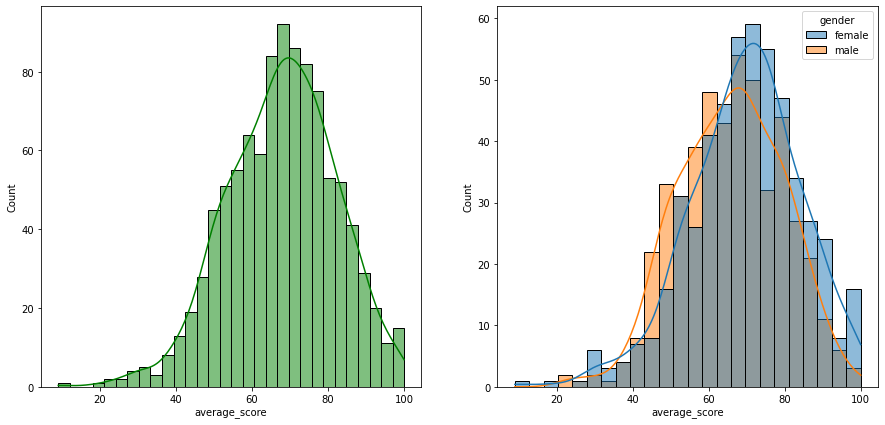

In [43]:
# Average score based on gender
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()